# Modeling

For our evaluation metric, we want to use RMSE. RMSE allows us to view the model's error in terms of the target's unit, making it easier to understand. 

We do intend to use clusters in some of our models, but I'm curious to see how the model performs without the clusters first. When all models have been run, we will compare them to see if the clusters we created improve our models.

For the models we will create for our MVP, the features we will be using are `tax_value`, `age`, `sq_ft`, and the clusters we created.

In [1]:
# imports
import wrangle as w
import model_stewart as m
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars
# turn off pink warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# wrangle data
train, validate, test = w.split_zillow(w.clean_zillow(w.acquire_zillow()))

train.shape, validate.shape, test.shape

((35198, 9), (15086, 9), (12571, 9))

In [3]:
# preview data
train.head()

,baths,beds,sq_ft,fullbaths,latitude,longitude,tax_value,logerror,age
357,2.5,2,1623,2,33881127,-117960510,512701.0,-0.001197,17.0
59413,3.0,3,2320,3,34155910,-118555819,151260.0,0.042012,64.0
61652,2.0,3,1193,2,34267022,-118292900,409034.0,-0.050940,66.0
10470,2.5,4,2539,2,33583890,-117645102,556210.0,-0.016098,30.0
49141,3.0,4,1717,3,34218400,-118535000,185649.0,0.027919,53.0


In [4]:
# view summary stats for target
train.logerror.describe()

count    35198.000000
mean         0.005774
std          0.044573
min         -0.116322
25%         -0.020522
50%          0.005386
75%          0.031535
max          0.130991
Name: logerror, dtype: float64

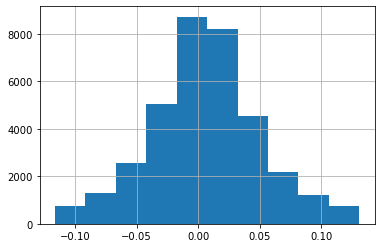

In [5]:
# view logerror distribution
train.logerror.hist();

To establish a baseline, I want to use median rather than mean. Looking at the histogram and summary statistics above, the median seems to be more representative of the data than mean.

In [6]:
# establish baseline
baseline = train.logerror.median()
baseline

0.0053863287428900005

In [7]:
# split data into x and y
# scaled_cols = ['tax_value', 'age', 'sq_ft']

# x_train = train[scaled_cols]
# y_train = train.logerror

# x_validate = validate[scaled_cols]
# y_validate = validate.logerror

In [8]:
# import eval metric
# from sklearn.metrics import mean_squared_error

# # evaluate baseline
# y_train = pd.DataFrame(y_train)
# y_validate = pd.DataFrame(y_validate)

# y_train['baseline'] = baseline
# y_validate['baseline'] = baseline

# rmse_train = mean_squared_error(y_train.logerror, y_train.baseline)**0.5
# rmse_validate = mean_squared_error(y_validate.logerror, y_validate.baseline)**0.5

# print('Baseline(median `logerror`) RMSE')
# print(f'Train: {rmse_train}')
# print(f'Validate: {rmse_validate}')

In [9]:
# run ols model (without clusters)
from sklearn.linear_model import LinearRegression

# # create object
# lm = LinearRegression(normalize=True)
# # fit model to train
# lm.fit(x_train, y_train.logerror)
# # train predictions
# y_train['ols_pred'] = lm.predict(x_train)
# # evaluate model on train
# rmse_train_ols = mean_squared_error(y_train.logerror, y_train.ols_pred)**0.5
# # validate predictions
# y_validate['ols_pred'] = lm.predict(x_validate)
# # evaluate model on validate
# rmse_validate_ols = mean_squared_error(y_validate.logerror, y_validate.ols_pred)**0.5

# # print results
# print(f'OLS RMSE Train: {rmse_train_ols}')
# print(f'OLS RMSE Validate: {rmse_validate_ols}')

In [10]:
# run lassolars without clusters
# from sklearn.linear_model import LassoLars

# # create object
# lars = LassoLars()
# # fit model to train
# lars.fit(x_train, y_train.logerror)
# # make predictions on train
# y_train['ll_pred'] = lars.predict(x_train)
# # evaluate model on train
# rmse_train_ll = mean_squared_error(y_train.logerror, y_train.ll_pred)**0.5
# # validate predictions
# y_validate['ll_pred'] = lars.predict(x_validate)
# # evaluate model on validate
# rmse_validate_ll = mean_squared_error(y_validate.logerror, y_validate.ll_pred)**0.5

# # print results
# print(f'LassoLars RMSE Train: {rmse_train_ll}')
# print(f'LassoLars RMSE Validate: {rmse_validate_ll}')

In [11]:
# # view results as dataframe
# rmse = pd.DataFrame({'Linear Regression':[rmse_train_ols, rmse_validate_ols, (rmse_train_ols-rmse_validate_ols)],
#                     'LassoLars':[rmse_train_ll, rmse_validate_ll, (rmse_train_ll-rmse_validate_ll)],
#                     'Baseline':[rmse_train, rmse_validate, (rmse_train-rmse_validate)]},
#                     index=['train', 'validate', 'difference'])
# rmse

**Takeaways:**
- Without using any of the clusters we made in exploration, the Polynomial Regression model appears to perform best. 
 - This model has the lowest RMSE for both train and validate, and it has the smallest difference between train/validate RMSE. 
- All of the models created so far in this notebook have beaten the baseline (median logerror) by a very small margin.

In [12]:
# # use selectkbest to get top features
# from sklearn.feature_selection import SelectKBest, f_regression
# # set parameters for f_selector object
# f_selector = SelectKBest(f_regression, k=2)
# # fit object to data
# f_selector.fit(x_train, y_train.logerror)
# # get bool mask of features list
# f_mask = f_selector.get_support()
# # get list of features (True)
# f_feature = x_train.iloc[:,f_mask].columns.tolist()
# f_feature

In [13]:
X_train, X_validate, X_test = m.scale_and_cluster(train, validate, test, ['sq_ft', 'tax_value', 'age'], ['beds', 'baths', 'sq_ft'], 4)
X_train, X_validate, X_test = m.encode_clusters(X_train, X_validate, X_test)

In [14]:
X_train

,sq_ft,tax_value,age,cluster__0,cluster__1,cluster__2,cluster__3
0,-0.133909,0.056580,-1.524003,1,0,0,0
1,0.654473,-0.571795,0.550482,0,1,0,0
2,-0.620285,-0.123648,0.638758,1,0,0,0
3,0.902186,0.132222,-0.950209,0,1,0,0
4,-0.027585,-0.512009,0.064964,0,1,0,0
...,...,...,...,...,...,...,...
35193,0.489331,1.999612,1.036000,0,1,0,0
35194,0.145475,1.217584,-1.700555,1,0,0,0
35195,-0.861211,-0.546725,0.859448,0,0,0,1
35196,-0.464192,-0.549584,1.168414,0,0,0,1


In [15]:
# def scale_and_cluster(train, validate, test, model_vars, cluster_vars, k):
#     '''
#     This function takes in a list of variables to be modeled on, a list of features to
#     cluster by, and a k-value to determine the number of clusters to create.
#     It returns train, validate, and test dataframes with a cluster column, as well as scaled versions
#     of train, validate, and test with a cluster column.
#     '''
#     from sklearn.preprocessing import StandardScaler
#     from sklearn.cluster import KMeans
#     # define independent variables
#     X_train = pd.concat([train[model_vars], train[cluster_vars]], axis=1)
#     X_train = X_train.loc[:,~X_train.columns.duplicated()]
#     X_validate = pd.concat([validate[model_vars], validate[cluster_vars]], axis=1)
#     X_validate = X_validate.loc[:,~X_validate.columns.duplicated()]
#     X_test = pd.concat([test[model_vars], test[cluster_vars]], axis=1)
#     X_test = X_test.loc[:,~X_test.columns.duplicated()]
#     # scale features
#     scaler = StandardScaler().fit(X_train)
#     X_scaled_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
#     X_scaled_validate = pd.DataFrame(scaler.transform(X_validate), columns = X_validate.columns)
#     X_scaled_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
#     # create kmeans object
#     kmeans = KMeans(n_clusters=k, random_state=123)
#     # fit object
#     kmeans.fit(X_scaled_train[cluster_vars])
#     # make predictions
#     kmeans.predict(X_scaled_train[cluster_vars])
#     # create columns for predictions
#     train['cluster'] = kmeans.predict(X_scaled_train[cluster_vars])
#     X_scaled_train['cluster'] = kmeans.predict(X_scaled_train[cluster_vars])
#     validate['cluster'] = kmeans.predict(X_scaled_validate[cluster_vars])
#     X_scaled_validate['cluster'] = kmeans.predict(X_scaled_validate[cluster_vars])
#     test['cluster'] = kmeans.predict(X_scaled_test[cluster_vars])
#     X_scaled_test['cluster'] = kmeans.predict(X_scaled_test[cluster_vars])
#     model_vars.append('cluster')
#     X_train = X_scaled_train[model_vars]
#     X_validate = X_scaled_validate[model_vars]
#     X_test = X_scaled_test[model_vars]
#     return X_train, X_validate, X_test

In [16]:
# X_train, X_validate, X_test = scale_and_cluster(train, validate, test, ['tax_value', 'age', 'sq_ft'], ['beds', 'baths', 'sq_ft'], 4)

In [17]:
# def encode_clusters(X_train, X_validate, X_test):
#     '''
# This function takes in scaled X_train/validate/test dfs and encodes the cluster column. Dropping the 
# original unencoded cluster column.
#     '''
    
#     #encode cluster column
#     dummy_train_df = pd.get_dummies(X_train.cluster, prefix='cluster_')
#     dummy_validate_df = pd.get_dummies(X_validate.cluster, prefix='cluster_')
#     dummy_test_df = pd.get_dummies(X_test.cluster, prefix='cluster_')
    
#     encoded_train = pd.concat([X_train , dummy_train_df], axis = 1)
#     encoded_validate = pd.concat([X_validate , dummy_validate_df], axis = 1)
#     encoded_test = pd.concat([X_test , dummy_test_df], axis = 1)
    
#     X_train_encoded = encoded_train.drop(columns = ['cluster'])
#     X_validate_encoded = encoded_validate.drop(columns = ['cluster'])
#     X_test_encoded = encoded_test.drop(columns = ['cluster'])
        
#     return X_train_encoded, X_validate_encoded, X_test_encoded

In [18]:
# X_train, X_validate, X_test = scale_and_cluster(train, validate, test, ['tax_value', 'age', 'sq_ft'], ['beds', 'baths', 'sq_ft'], 4)
# X_train, X_validate, X_test = encode_clusters(X_train, X_validate, X_test)
# X_train.head()

In [19]:
# def model_features(target, X_scaled_train, X_scaled_validate, X_scaled_test, y_train, y_validate, y_test):
#     #baseline_prediction
#     median = y_train[target].median()
#     y_train['baseline_pred'] = median
#     y_validate['baseline_pred'] = median
   
#     rmse_baseline_train = mean_squared_error(y_train[target], y_train.baseline_pred)**(1/2)
#     rmse_baseline_validate = mean_squared_error(y_train[target], y_train.baseline_pred)**(1/2)
   
#     print('Baseline RSME')
#     print(f'rmse_baseline_train: {rmse_baseline_train}')
#     print(f'rmse_baseline_validate: {rmse_baseline_validate}')
#     print()

# # plt.hist(y_train[target], color='blue', alpha=.5, label=f'{target.upper()}')
# #    plt.hist(y_train['baseline_pred'], bins=1, color='red', alpha=.5, rwidth=100, label=f'Predicted {target.upper()}')
# #    plt.xlabel(f'{target.upper()}')
# #    plt.legend()
# #    plt.show();
   
#    #model01_prediction
#     lm = LinearRegression(normalize=True)
#     lm.fit(X_scaled_train, y_train[target])
   
#     y_train['model01_pred'] = lm.predict(X_scaled_train)
#     y_validate['model01_pred'] = lm.predict(X_scaled_validate)
   
#     rsme_model01_train = (mean_squared_error(y_train.logerror, y_train['model01_pred']))**(1/2)
#     rsme_model01_validate = (mean_squared_error(y_validate.logerror, y_validate['model01_pred']))**(1/2)
   
#     print('Model 01 | Linear Reg OLS RMSE')
#     print(f'rmse_model01_train: {rsme_model01_train}')
#     print(f'rmse_model01_validate: {rsme_model01_validate}')   
#     print()
   
#    # model02_prediction
#     lars = LassoLars(alpha=1.0)
#     lars.fit(X_scaled_train, y_train[target])
   
#     y_train['model02_pred'] = lars.predict(X_scaled_train)
#     y_validate['model02_pred'] = lars.predict(X_scaled_validate)
   
#     rsme_model02_train = (mean_squared_error(y_train.logerror, y_train['model02_pred']))**(1/2)
#     rsme_model02_validate = (mean_squared_error(y_validate.logerror, y_validate['model02_pred']))**(1/2)
   
#     print('Model 02 | LassoLars RMSE')
#     print(f'rmse_model02_train: {rsme_model02_train}')
#     print(f'rmse_model02_validate: {rsme_model02_validate}')   
#     print()

In [20]:
# model_features('logerror', X_train[['tax_value', 'age', 'sq_ft']], X_validate[['tax_value', 'age', 'sq_ft']], X_test[['tax_value', 'age', 'sq_ft']], pd.DataFrame(train.logerror), pd.DataFrame(validate.logerror), pd.DataFrame(test.logerror))

In [21]:
# model_features('logerror', X_train, X_validate, X_test, pd.DataFrame(train.logerror), pd.DataFrame(validate.logerror), pd.DataFrame(test.logerror))

In [22]:
# define y
# y_train = pd.DataFrame(train.logerror)
# y_validate = pd.DataFrame(validate.logerror)
# y_test = pd.DataFrame(test.logerror)

# # run ols with clusters
# # create object
# lm = LinearRegression(normalize=True)
# # fit model to train
# lm.fit(X_train, y_train)
# # train predictions
# y_train['ols_pred'] = lm.predict(X_train)
# # evaluate model on train
# rmse_train_ols_cl = mean_squared_error(y_train.logerror, y_train.ols_pred)**0.5
# # validate predictions
# y_validate['ols_pred'] = lm.predict(X_validate)
# # evaluate model on validate
# rmse_validate_ols_cl = mean_squared_error(y_validate.logerror, y_validate.ols_pred)**0.5

# # print results
# print(f'OLS RMSE Train: {rmse_train_ols_cl}')
# print(f'OLS RMSE Validate: {rmse_validate_ols_cl}')

In [23]:
# run ols without clusters
# create object
# lm = LinearRegression(normalize=True)
# # fit model to train
# lm.fit(X_train[['tax_value', 'age', 'sq_ft']], y_train)
# # train predictions
# y_train['ols_pred'] = lm.predict(X_train[['tax_value', 'age', 'sq_ft']])
# # evaluate model on train
# rmse_train_ols = mean_squared_error(y_train.logerror, y_train.ols_pred)**0.5
# # validate predictions
# y_validate['ols_pred'] = lm.predict(X_validate[['tax_value', 'age', 'sq_ft']])
# # evaluate model on validate
# rmse_validate_ols = mean_squared_error(y_validate.logerror, y_validate.ols_pred)**0.5

# # print results
# print(f'OLS RMSE Train: {rmse_train_ols}')
# print(f'OLS RMSE Validate: {rmse_validate_ols}')

In [24]:
# run lassolars with clusters
# from sklearn.linear_model import LassoLars

# # create object
# lars = LassoLars()
# # fit model to train
# lars.fit(X_train, y_train.logerror)
# # make predictions on train
# y_train['ll_pred'] = lars.predict(X_train)
# # evaluate model on train
# rmse_train_ll_cl = mean_squared_error(y_train.logerror, y_train.ll_pred)**0.5
# # validate predictions
# y_validate['ll_pred'] = lars.predict(X_validate)
# # evaluate model on validate
# rmse_validate_ll_cl = mean_squared_error(y_validate.logerror, y_validate.ll_pred)**0.5

# # print results
# print(f'LassoLars RMSE Train: {rmse_train_ll_cl}')
# print(f'LassoLars RMSE Validate: {rmse_validate_ll_cl}')

In [25]:
# run lassolars without clusters
# from sklearn.linear_model import LassoLars

# # create object
# lars = LassoLars()
# # fit model to train
# lars.fit(X_train[['tax_value', 'age', 'sq_ft']], y_train.logerror)
# # make predictions on train
# y_train['ll_pred'] = lars.predict(X_train[['tax_value', 'age', 'sq_ft']])
# # evaluate model on train
# rmse_train_ll = mean_squared_error(y_train.logerror, y_train.ll_pred)**0.5
# # validate predictions
# y_validate['ll_pred'] = lars.predict(X_validate[['tax_value', 'age', 'sq_ft']])
# # evaluate model on validate
# rmse_validate_ll = mean_squared_error(y_validate.logerror, y_validate.ll_pred)**0.5

# # print results
# print(f'LassoLars RMSE Train: {rmse_train_ll}')
# print(f'LassoLars RMSE Validate: {rmse_validate_ll}')

In [26]:
# view results as dataframe
# rmse = pd.DataFrame({'OLS with Clusters':[rmse_train_ols_cl, rmse_validate_ols_cl, (rmse_train_ols_cl-rmse_validate_ols_cl)],
#                      'OLS without Clusters':[rmse_train_ols, rmse_validate_ols, (rmse_train_ols-rmse_validate_ols)],
#                      'LassoLars with Clusters':[rmse_train_ll_cl, rmse_validate_ll_cl, (rmse_train_ll_cl-rmse_validate_ll_cl)],
#                      'LassoLars without Clusters':[rmse_train_ll, rmse_validate_ll, (rmse_train_ll-rmse_validate_ll)],
#                      'Baseline':[rmse_train, rmse_validate, (rmse_train-rmse_validate)]},
#                     index=['train', 'validate', 'difference'])
# rmse

Based on the results of our models, it appears the OLS models performed best. Of those, 
- both models performed better on validate than on train
- the model with clusters performed better on the train set
- the model without clusters performed better on the validate set
- there was less of a difference between train and validate for the OLS model with clusters

In [27]:
def model_features_df(target, X_scaled_train, X_scaled_validate, X_scaled_test, y_train, y_validate, y_test, model_vars):
#baseline_prediction
    median = y_train[target].median()
    y_train['baseline_pred'] = median
    y_validate['baseline_pred'] = median
   
    rmse_baseline_train = mean_squared_error(y_train[target], y_train.baseline_pred)**(1/2)
    rmse_baseline_validate = mean_squared_error(y_validate[target], y_validate.baseline_pred)**(1/2)

   #model01_prediction
    lm = LinearRegression(normalize=True)
    lm.fit(X_scaled_train, y_train[target])
   
    y_train['model01_pred'] = lm.predict(X_scaled_train)
    y_validate['model01_pred'] = lm.predict(X_scaled_validate)
   
    rsme_model01_train = (mean_squared_error(y_train.logerror, y_train['model01_pred']))**(1/2)
    rsme_model01_validate = (mean_squared_error(y_validate.logerror, y_validate['model01_pred']))**(1/2)
   
    #model02_prediction
    lars = LassoLars(alpha=1.0)
    lars.fit(X_scaled_train, y_train[target])
   
    y_train['model02_pred'] = lars.predict(X_scaled_train)
    y_validate['model02_pred'] = lars.predict(X_scaled_validate)
   
    rsme_model02_train = (mean_squared_error(y_train.logerror, y_train['model02_pred']))**(1/2)
    rsme_model02_validate = (mean_squared_error(y_validate.logerror, y_validate['model02_pred']))**(1/2)

    
    #model03_prediction
    lm = LinearRegression(normalize=True)
    lm.fit(X_scaled_train[model_vars], y_train[target])
   
    y_train['model03_pred'] = lm.predict(X_scaled_train[model_vars])
    y_validate['model03_pred'] = lm.predict(X_scaled_validate[model_vars])
   
    rsme_model03_train = (mean_squared_error(y_train.logerror, y_train['model03_pred']))**(1/2)
    rsme_model03_validate = (mean_squared_error(y_validate.logerror, y_validate['model03_pred']))**(1/2)
    
    #model04_prediction
    lars.fit(X_scaled_train[model_vars], y_train[target])
   
    y_train['model04_pred'] = lars.predict(X_scaled_train[model_vars])
    y_validate['model04_pred'] = lars.predict(X_scaled_validate[model_vars])
   
    rsme_model04_train = (mean_squared_error(y_train.logerror, y_train['model04_pred']))**(1/2)
    rsme_model04_validate = (mean_squared_error(y_validate.logerror, y_validate['model04_pred']))**(1/2)
   
    return pd.DataFrame({'OLS with Clusters':[rsme_model01_train, rsme_model01_validate, (rsme_model01_train-rsme_model01_validate)],
                     'OLS without Clusters':[rsme_model03_train, rsme_model03_validate, (rsme_model03_train-rsme_model03_validate)],
                     'LassoLars with Clusters':[rsme_model02_train, rsme_model02_validate, (rsme_model02_train-rsme_model02_validate)],
                     'LassoLars without Clusters':[rsme_model04_train, rsme_model04_validate, (rsme_model04_train-rsme_model04_validate)],
                     'Baseline':[rmse_baseline_train, rmse_baseline_validate, (rmse_baseline_train-rmse_baseline_validate)]},
                    index=['train', 'validate', 'difference'])

In [28]:
m.model_features_df('logerror', X_train, X_validate, X_test, pd.DataFrame(train.logerror), pd.DataFrame(validate.logerror), pd.DataFrame(test.logerror), ['tax_value', 'age', 'sq_ft'])

,OLS with Clusters,OLS without Clusters,LassoLars with Clusters,LassoLars without Clusters,Baseline
train,0.044291,0.044297,0.044573,0.044573,0.044574
validate,0.044402,0.044407,0.044676,0.044676,0.044681
difference,-0.000111,-0.000109,-0.000104,-0.000104,-0.000106


In [29]:
residuals = pd.DataFrame({'actual':train.logerror,
                  'Baseline':train.logerror.median()-train.logerror,
                  'M01':LinearRegression(normalize=True).fit(X_train, train.logerror)
.predict(X_train)-train.logerror,
                  'M02':LassoLars().fit(X_train, train.logerror).predict(X_train)-train.logerror,
                  'M03':LinearRegression(normalize=True).fit(X_train[['tax_value', 'age', 'sq_ft']], train.logerror)
.predict(X_train[['tax_value', 'age', 'sq_ft']])-train.logerror,
                  'M04':LassoLars().fit(X_train[['tax_value', 'age', 'sq_ft']], train.logerror).predict(X_train[['tax_value', 'age', 'sq_ft']])-train.logerror})

residuals

,actual,Baseline,M01,M02,M03,M04
357,-0.001197,0.006584,0.006877,0.006971,0.007168,0.006971
59413,0.042012,-0.036626,-0.034334,-0.036238,-0.033644,-0.036238
61652,-0.050940,0.056326,0.052656,0.056714,0.053478,0.056714
10470,-0.016098,0.021484,0.026080,0.021872,0.026577,0.021872
49141,0.027919,-0.022533,-0.023659,-0.022145,-0.022435,-0.022145
...,...,...,...,...,...,...
15957,0.017450,-0.012064,-0.010775,-0.011676,-0.009455,-0.011676
15419,0.090593,-0.085206,-0.083201,-0.084819,-0.082946,-0.084819
54394,0.000927,0.004460,0.001058,0.004847,0.000275,0.004847
53576,0.035142,-0.029756,-0.031180,-0.029368,-0.032267,-0.029368


In [30]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# sns.scatterplot(data=residuals.drop(columns='actual'))
# plt.axhline(y=0, ls=':')
# plt.ylabel('residual')
# plt.title('Residuals')

In [33]:
#model01_prediction
y_train = train.logerror
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

y_test = pd.DataFrame(test.logerror)
y_test['model01_pred'] = lm.predict(X_test)
   
rmse_model01_test = (mean_squared_error(y_test.logerror, y_test['model01_pred']))**(1/2)

print(f'Model 1 RMSE Test: {rmse_model01_test}')

Model 1 RMSE Test: 0.044453532009112715
